# Breast Cancer Classification Using Machine Learning


**Domain:** Healthcare  
**Dataset:** Breast Cancer Wisconsin (Diagnostic)  
**Goal:** Predict whether a tumor is malignant or benign using ML classification models.

This is an end-to-end machine learning project that includes preprocessing, visualization, model training, and evaluation.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv('data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



## 🎯 Goal Setting

- **Client:** Healthcare analytics company
- **Objective:** Detect cancer malignancy early using data-driven predictions
- **Target Variable:** `diagnosis` (M = Malignant, B = Benign)
- **Type of Problem:** Classification


In [4]:
# Drop unnecessary columns
df.drop(['id'], axis=1, inplace=True)
df.dropna(axis=1, inplace=True)

# Encode target variable
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})


Text(0.5, 1.0, 'Feature Correlation Heatmap')

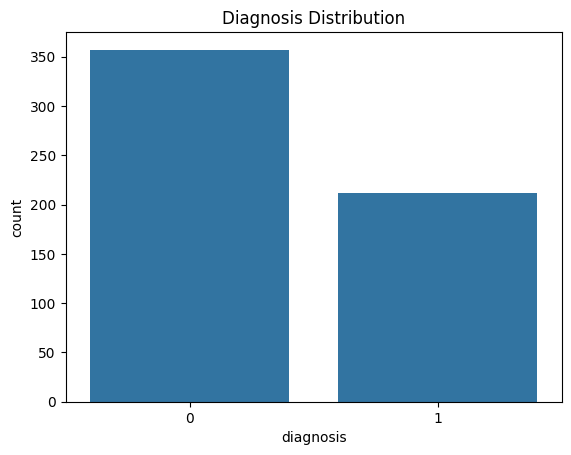

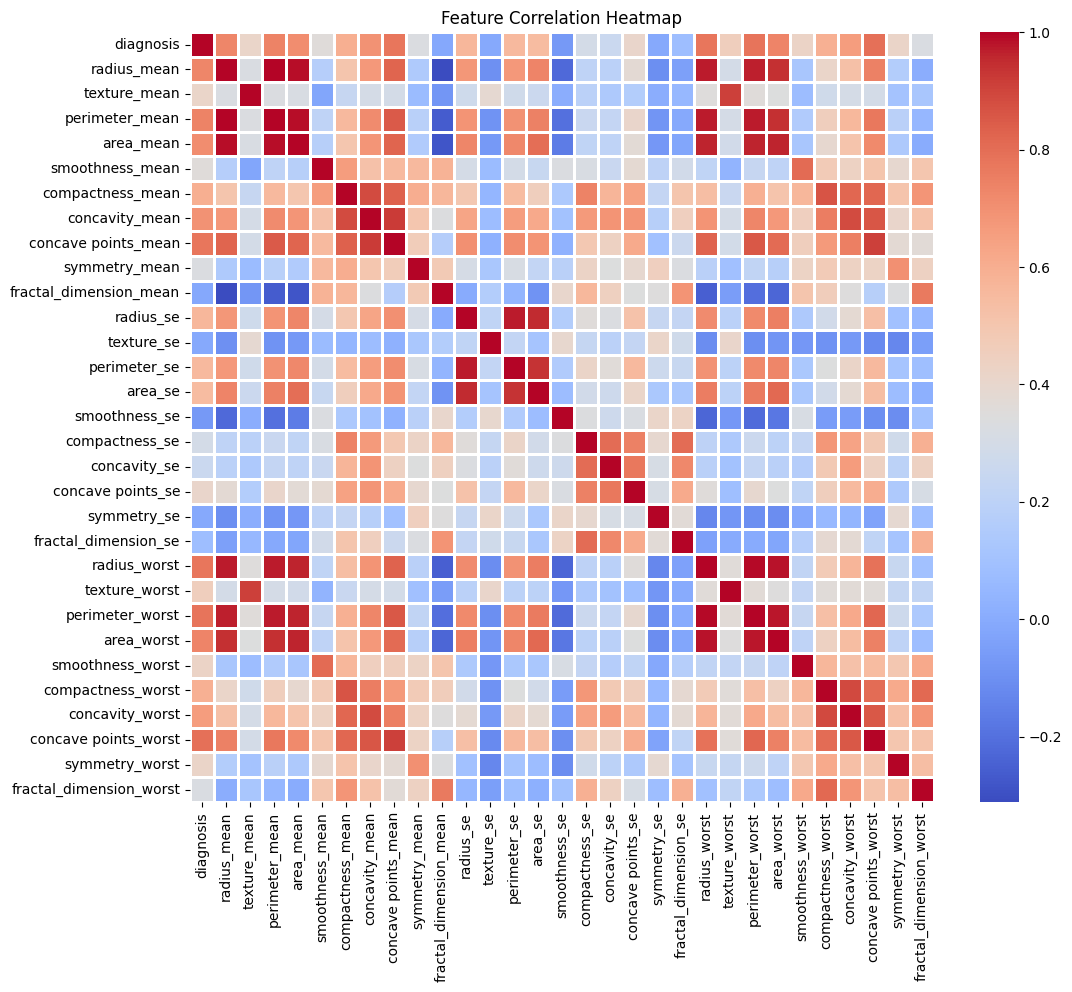

In [5]:
sns.countplot(x='diagnosis', data=df)
plt.title("Diagnosis Distribution")

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=1)
plt.title("Feature Correlation Heatmap")


In [6]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(0.5, 1.0, 'Confusion Matrix')

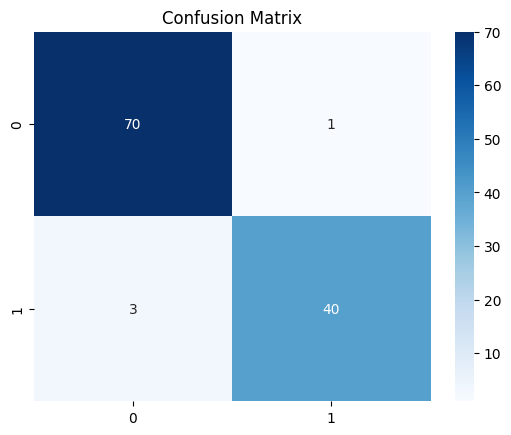

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")


In [9]:
from sklearn.svm import SVC

# Initialize and train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [12]:
# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluation metrics
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))



SVM Accuracy: 0.956140350877193

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


SVM Confusion Matrix:
 [[68  3]
 [ 2 41]]


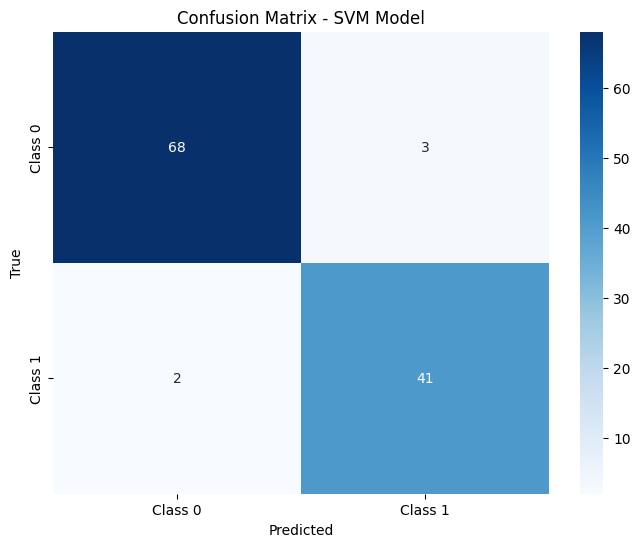

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


svm_predictions = svm_model.predict(X_test)


cm = confusion_matrix(y_test, svm_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM Model')
plt.show()


## ✅ Project Summary

- **Model Used:** Random Forest Classifier , SVM
- **Accuracy:** ~0.964%  
- **Output:** Tumor prediction - Benign or Malignant  
- **Next Steps:** Test more algorithms, apply cross-validation, deploy model for real-time usage

---

**Thank You!**
